In [332]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# TASK 1

In [333]:
train=pd.read_csv("DS3_C1_S3_DailyDelhiClimateTrain_Data_Practice.csv",parse_dates=True)
train

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [334]:
train.date=pd.to_datetime(train.date)
train.set_index('date',inplace=True)
train

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [335]:
test=pd.read_csv("DS3_C1_S3_DailyDelhiClimateTest_Data_Practice.csv",parse_dates=True)
test.date=pd.to_datetime(test.date)
test.set_index('date',inplace=True)
test

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000
2017-04-21,34.250000,39.375000,6.962500,999.875000
2017-04-22,32.900000,40.900000,8.890000,1001.600000


In [336]:
print(train.shape,test.shape)
df=pd.concat([train,test])

(1462, 4) (114, 4)


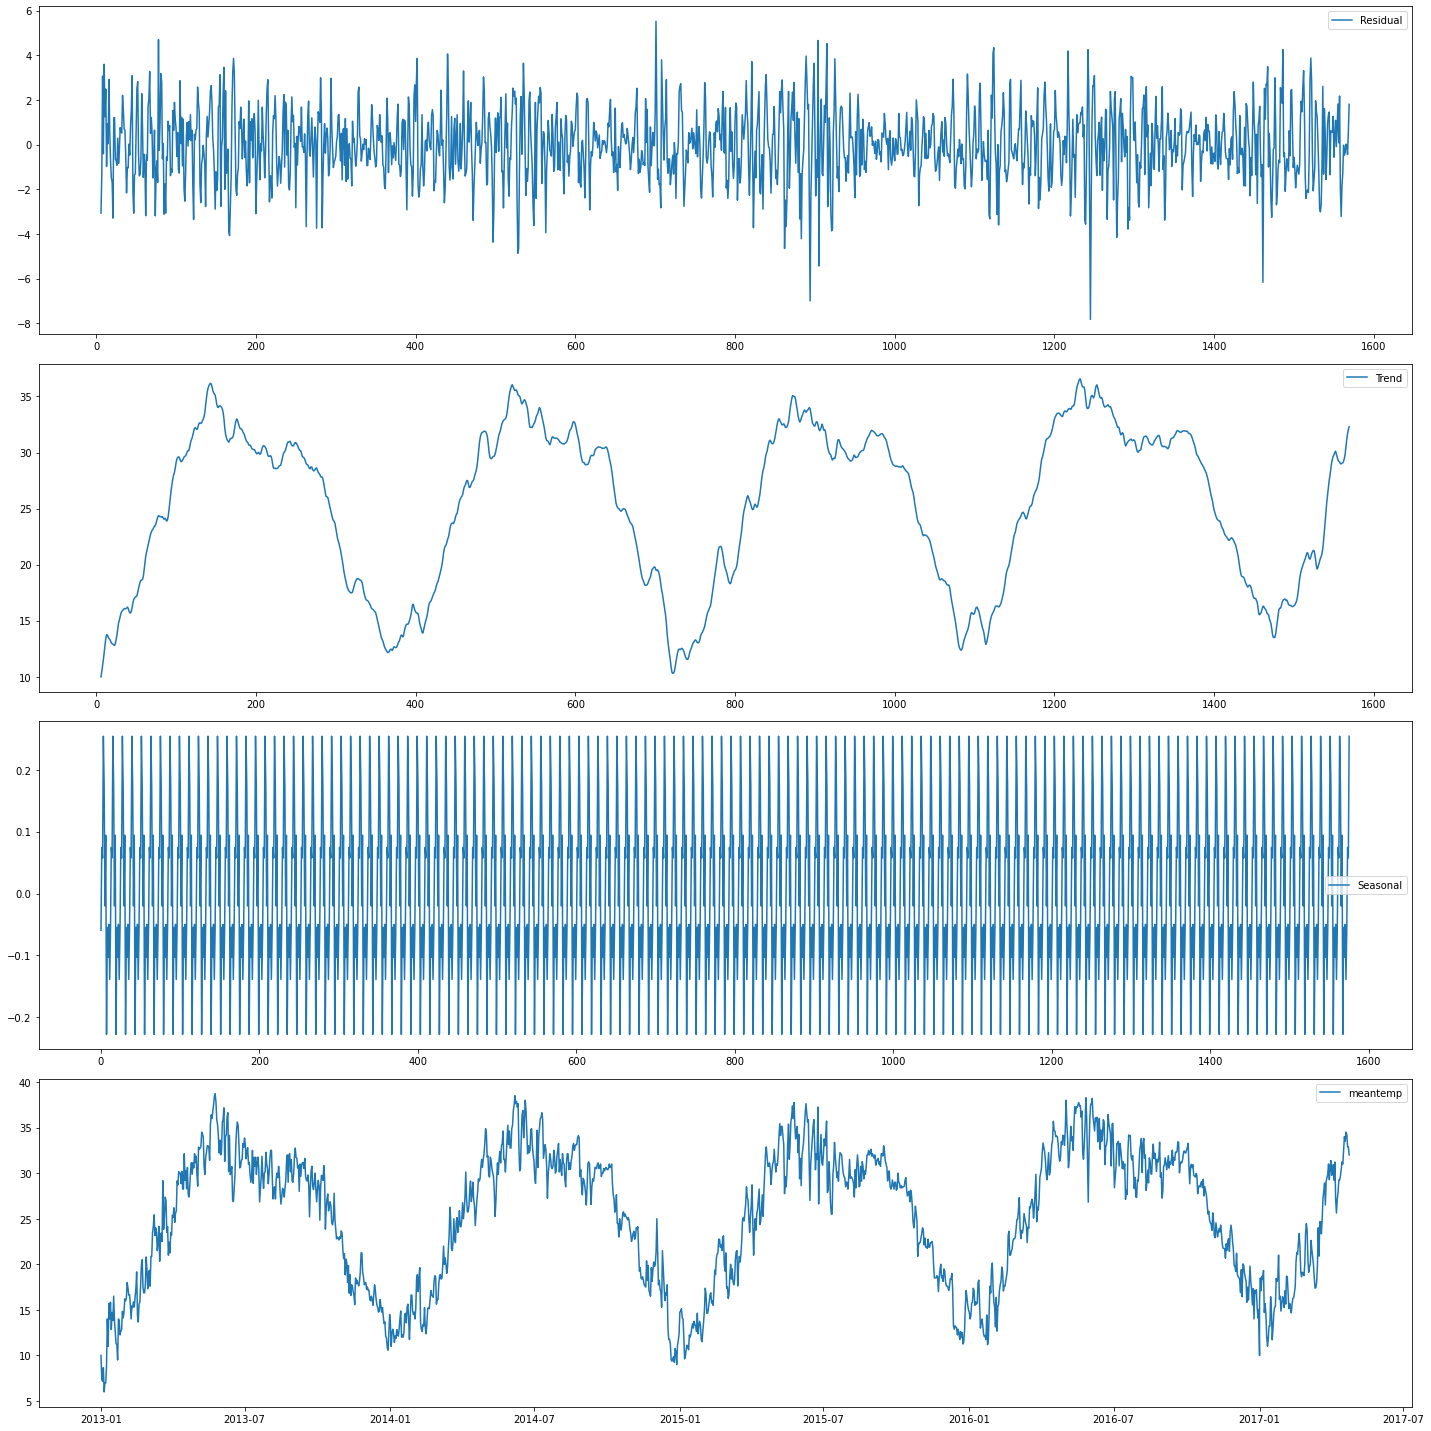

In [337]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing

decomposition=seasonal_decompose(np.asarray(df[['meantemp']]), period=12)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

fig,ax = plt.subplots(5,1,figsize=(20,20))

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(df[['meantemp']],label='meantemp')
plt.legend(loc='best')


plt.tight_layout()

In [338]:
data_7=df.resample('7D').mean()
data_7

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,7.604762,83.295238,2.903810,1017.685714
2013-01-08,13.176871,66.511905,8.013265,1015.942177
2013-01-15,13.409524,80.068027,4.471905,1017.972789
2013-01-22,12.848639,64.748299,4.981973,1019.884694
2013-01-29,16.107653,70.279592,3.396378,1016.554592
...,...,...,...,...
2017-03-21,27.752381,42.359524,10.662262,1010.076190
2017-03-28,30.346372,35.467687,9.259666,1006.323980
2017-04-04,28.427638,29.095748,12.672740,1007.433617


In [339]:
data=data_7[['meantemp']]
data

,meantemp
date,
2013-01-01,7.604762
2013-01-08,13.176871
2013-01-15,13.409524
2013-01-22,12.848639
2013-01-29,16.107653
...,...
2017-03-21,27.752381
2017-03-28,30.346372
2017-04-04,28.427638


In [340]:
ind= int(np.round(len(data)*0.7,0))
train_=data[:ind]
test_=data[ind:]

In [341]:
train_

,meantemp
date,
2013-01-01,7.604762
2013-01-08,13.176871
2013-01-15,13.409524
2013-01-22,12.848639
2013-01-29,16.107653
...,...
2015-12-08,16.061224
2015-12-15,12.571429
2015-12-22,13.214286


In [342]:
test_

,meantemp
date,
2016-01-12,15.099405
2016-01-19,12.233759
2016-01-26,17.418498
2016-02-02,15.067316
2016-02-09,18.157084
...,...
2017-03-21,27.752381
2017-03-28,30.346372
2017-04-04,28.427638


In [343]:
from statsmodels.tsa.stattools import adfuller,acf,pacf
def checkStationarity(data):
    pvalue = adfuller(data)[1]   
    if(pvalue>0.05):
        msg = 'p-value={}. data is not stationary'.format(pvalue)
    else:
        msg='p-value={}. data is stationary'.format(pvalue)
        
    return(msg)

In [344]:
ret=checkStationarity(train_); ret

'p-value=0.0005574502790166377. data is stationary'

In [345]:
ret=checkStationarity(test_); ret

'p-value=0.038746605571277085. data is stationary'

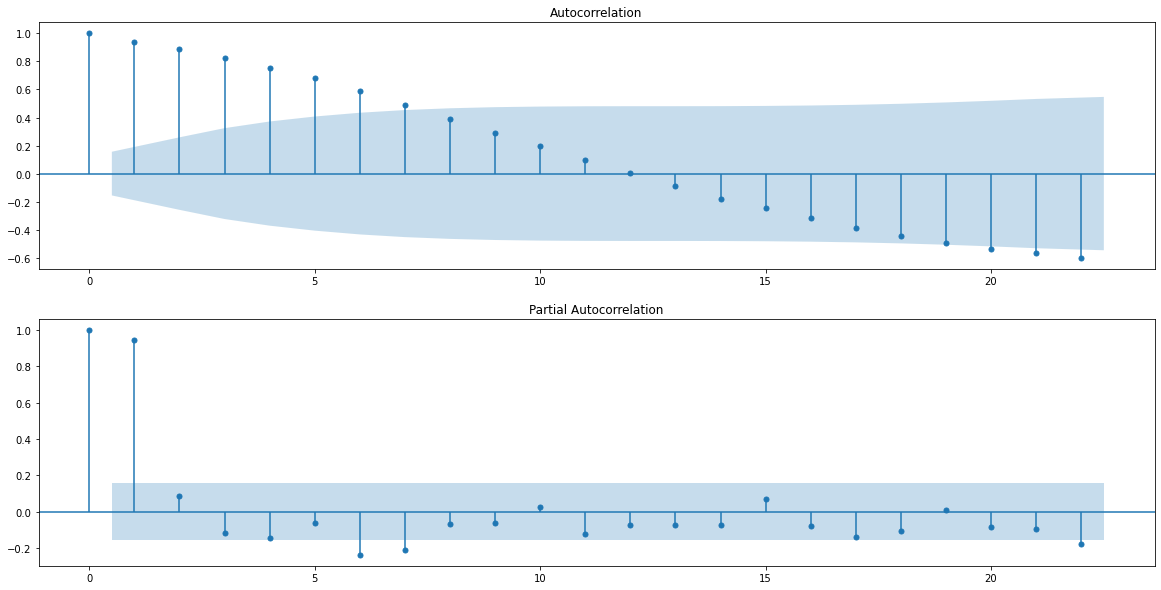

In [346]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig,ax=plt.subplots(2,1,figsize=(20,10))
plot_acf(train_,ax=ax[0])
plot_pacf(train_,ax=ax[1])
plt.show()

# TASK 2

In [347]:
from pmdarima.arima import auto_arima
def arima(data):
    m1 = auto_arima(data,start_p=1,max_p=5, start_q=1,max_q=5, seasonal=False, trace=True)
    return(m1.summary)

In [348]:
m1=arima(data)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=994.145, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2110.667, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1835.202, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=992.776, Time=0.21 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=974.608, Time=0.19 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=974.893, Time=0.30 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=992.076, Time=0.54 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=966.982, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=989.233, Time=0.24 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=963.930, Time=0.52 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=990.257, Time=0.27 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=991.770, Time=0

In [402]:
p=2
d=0
q=5
m1 = ARIMA(train_,order=(p,d,q)).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               meantemp   No. Observations:                  158
Model:                 ARIMA(2, 0, 5)   Log Likelihood                -320.443
Date:                Thu, 28 Apr 2022   AIC                            658.887
Time:                        15:36:10   BIC                            686.450
Sample:                    01-01-2013   HQIC                           670.080
                         - 01-05-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.8874      0.177    140.859      0.000      24.541      25.234
ar.L1          1.9763      0.006    315.692      0.000       1.964       1.989
ar.L2         -0.9913      0.006   -164.813      0.000      -1.003      -0.980
ma.L1         -1.3624      0.332     -4.109      0.000      -2.012      -0.713
ma.L2          0.2959      0.184      1.611      0.107      -0.064       0.656
ma.L3          0.0322      0.159      0.203      0.839      -0.279       0.343
ma.L4          0.1123      0.154      0.728      0.467      -0.190       0.415
ma.L5         -0.0766      0.105     -0.729      0.466      -0.283       0.129
sigma2         3.2299      1.121      2.882      0.004       1.033       5.427
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 4.36
Prob(Q):                              0.83   Prob(JB):                         0.11
Heteroskedasticity (H):               0.94   Skew:                            -0.41
Prob(H) (two-sided):                  0.81   Kurtosis:                         3.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [403]:
start = len(train_) 
end = len(train_) + len(test_) - 1

predictions = m1.predict(start,end,typ='levels')
print(predictions)

2016-01-12    15.049477
2016-01-19    14.946617
2016-01-26    15.279293
2016-02-02    15.818986
2016-02-09    16.344821
                ...    
2017-03-21    23.127011
2017-03-28    24.037855
2017-04-04    24.953591
2017-04-11    25.860386
2017-04-18    26.744662
Freq: 7D, Name: predicted_mean, Length: 67, dtype: float64


In [404]:
actual = []; pred = []

for i in range(len(predictions)):
    actual.append(test_['meantemp'][i])
    pred.append(predictions[i])

df_res = pd.DataFrame({'actual':actual, 'predicted':pred})
df_res['err'] = df_res.actual - df_res.predicted
print(df_res)

       actual  predicted       err
0   15.099405  15.049477  0.049928
1   12.233759  14.946617 -2.712858
2   17.418498  15.279293  2.139205
3   15.067316  15.818986 -0.751670
4   18.157084  16.344821  1.812263
..        ...        ...       ...
62  27.752381  23.127011  4.625370
63  30.346372  24.037855  6.308517
64  28.427638  24.953591  3.474047
65  30.492063  25.860386  4.631678
66  33.432143  26.744662  6.687481

[67 rows x 3 columns]


<AxesSubplot:>

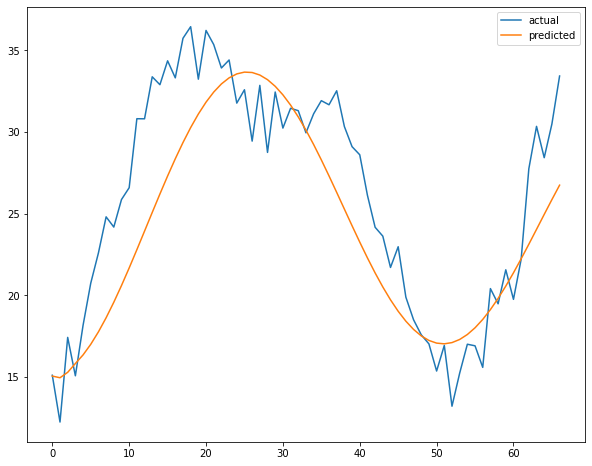

In [405]:
df_res.actual.plot(figsize=(10,8),legend=True)
df_res.predicted.plot(legend=True)


# TASK 3

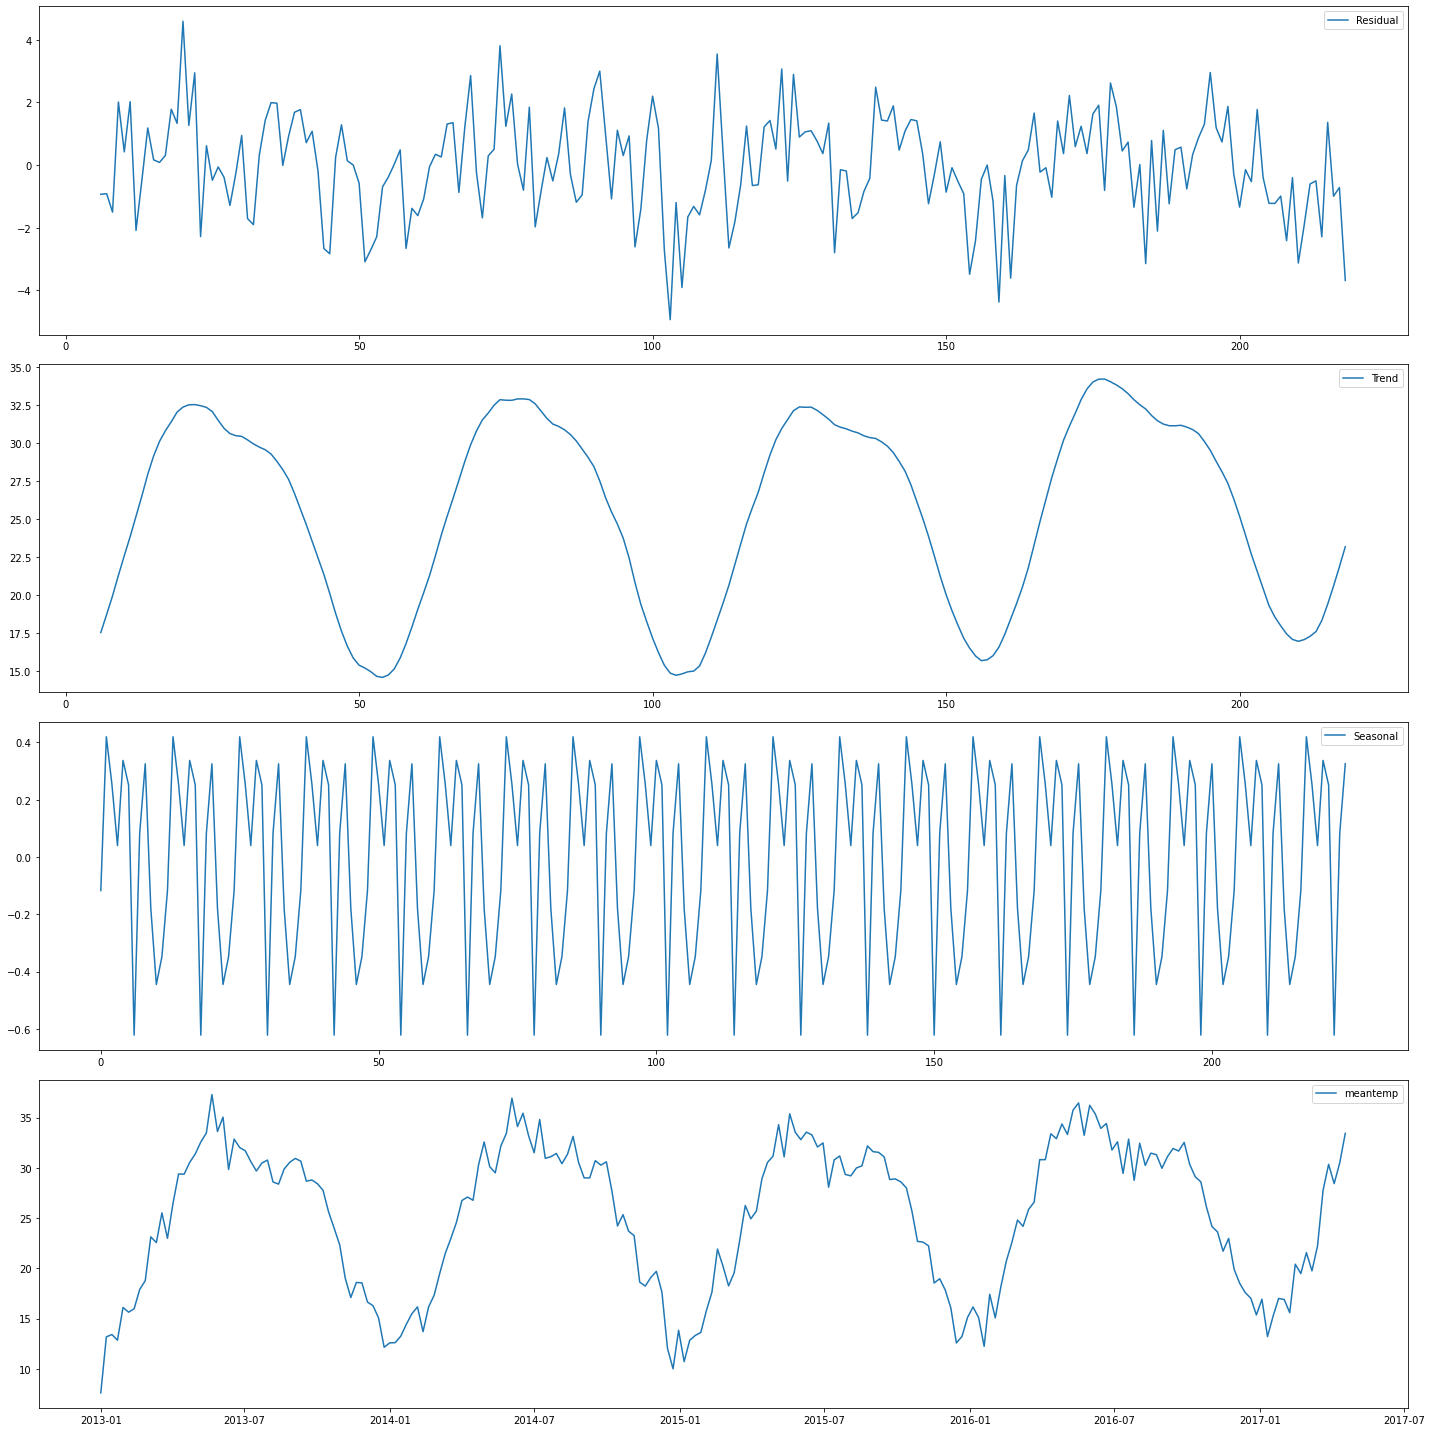

In [355]:
decomposition=seasonal_decompose(np.asarray(data), period=12)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

fig,ax = plt.subplots(5,1,figsize=(20,20))

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(data,label='meantemp')
plt.legend(loc='best')


plt.tight_layout()

In [356]:
m1 = auto_arima(data,start_p=0,max_p=3, start_q=1,max_q=3, seasonal=True, trace=True)
m1.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1326.416, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1530.115, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=991.230, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2110.667, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=991.123, Time=0.17 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=984.903, Time=0.19 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=941.702, Time=0.63 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=990.472, Time=0.33 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=988.034, Time=0.71 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=937.775, Time=0.52 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=986.210, Time=0.20 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=990.209, Time=0.38 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=991.760, Time=0.23 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=987.119, Time=0.27 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=98

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  225
Model:               SARIMAX(2, 0, 2)   Log Likelihood                -462.887
Date:                Thu, 28 Apr 2022   AIC                            937.775
Time:                        11:26:14   BIC                            958.271
Sample:                             0   HQIC                           946.047
                                - 225                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4026      0.043      9.296      0.000       0.318       0.487
ar.L1          1.9726      0.007    289.379      0.000       1.959       1.986
ar.L2         -0.9884      0.007   -148.115      0.000      -1.002      -0.975
ma.L1         -1.3330      0.067    -19.976      0.000      -1.464      -1.202
ma.L2          0.3851      0.069      5.575      0.000       0.250       0.521
sigma2         3.5056      0.341     10.289      0.000       2.838       4.173
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 2.06
Prob(Q):                              0.75   Prob(JB):                         0.36
Heteroskedasticity (H):               1.12   Skew:                            -0.23
Prob(H) (two-sided):                  0.62   Kurtosis:                         3.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [406]:
p=2; d=0;q=2
m2 = sm.tsa.statespace.SARIMAX(train_,order=(p,d,q),seasonal_order=(p,d,q,52)).fit()

In [407]:
start = len(train_) 
end = len(train_) + len(test_) - 1

predictions_ = m2.predict(start,end,typ='levels')
print(predictions_)

2016-01-12    15.712197
2016-01-19    15.453290
2016-01-26    15.725818
2016-02-02    15.819797
2016-02-09    16.164993
                ...    
2017-03-21     7.686738
2017-03-28     7.917476
2017-04-04     7.830126
2017-04-11     7.579274
2017-04-18     7.915655
Freq: 7D, Name: predicted_mean, Length: 67, dtype: float64


In [408]:
test_

,meantemp
date,
2016-01-12,15.099405
2016-01-19,12.233759
2016-01-26,17.418498
2016-02-02,15.067316
2016-02-09,18.157084
...,...
2017-03-21,27.752381
2017-03-28,30.346372
2017-04-04,28.427638


In [409]:
actual_ = []; pred_ = []

for i in range(len(predictions_)):
    actual_.append(test_['meantemp'][i])
    pred_.append(predictions_[i])

df_res_ = pd.DataFrame({'actual':actual_, 'predicted':pred_})
df_res_['err'] = df_res_.actual - df_res_.predicted
print(df_res_)

       actual  predicted        err
0   15.099405  15.712197  -0.612793
1   12.233759  15.453290  -3.219532
2   17.418498  15.725818   1.692680
3   15.067316  15.819797  -0.752481
4   18.157084  16.164993   1.992091
..        ...        ...        ...
62  27.752381   7.686738  20.065643
63  30.346372   7.917476  22.428896
64  28.427638   7.830126  20.597512
65  30.492063   7.579274  22.912790
66  33.432143   7.915655  25.516488

[67 rows x 3 columns]


<AxesSubplot:>

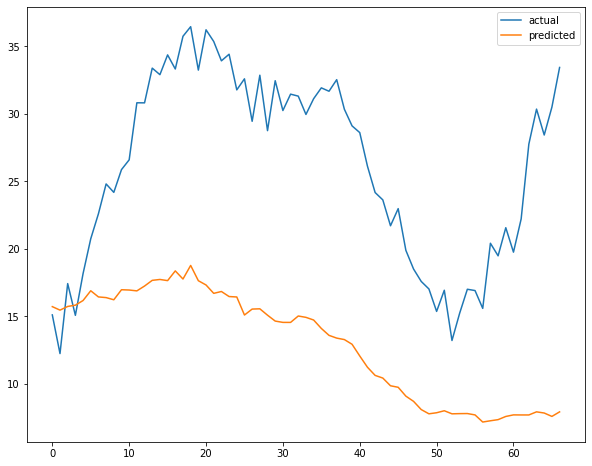

In [410]:
df_res_.actual.plot(figsize=(10,8),legend=True)
df_res_.predicted.plot(legend=True)

# TASK 4

In [411]:
ind= int(np.round(len(data_7)*0.7,0))
train_X=data_7.iloc[:ind,0]
test_X=data_7.iloc[ind:,0]
exog_train = data_7.iloc[:ind,1:]
exog_test = data_7.iloc[ind:,1:]

In [412]:
model = auto_arima(data,start_p=0,max_p=3, start_q=1,max_q=3, seasonal=True, trace=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1326.416, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1530.115, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=991.230, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2110.667, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=991.123, Time=0.16 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=984.903, Time=0.23 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=941.702, Time=0.62 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=990.472, Time=0.32 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=988.034, Time=0.71 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=937.775, Time=0.55 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=986.210, Time=0.19 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=990.209, Time=0.35 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=991.760, Time=0.18 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=987.119, Time=0.28 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=98

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  225
Model:               SARIMAX(2, 0, 2)   Log Likelihood                -462.887
Date:                Thu, 28 Apr 2022   AIC                            937.775
Time:                        15:40:42   BIC                            958.271
Sample:                             0   HQIC                           946.047
                                - 225                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4026      0.043      9.296      0.000       0.318       0.487
ar.L1          1.9726      0.007    289.379      0.000       1.959       1.986
ar.L2         -0.9884      0.007   -148.115      0.000      -1.002      -0.975
ma.L1         -1.3330      0.067    -19.976      0.000      -1.464      -1.202
ma.L2          0.3851      0.069      5.575      0.000       0.250       0.521
sigma2         3.5056      0.341     10.289      0.000       2.838       4.173
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 2.06
Prob(Q):                              0.75   Prob(JB):                         0.36
Heteroskedasticity (H):               1.12   Skew:                            -0.23
Prob(H) (two-sided):                  0.62   Kurtosis:                         3.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [413]:
p=2
d=0
q=2
model = sm.tsa.statespace.SARIMAX(train_X, order=(p,d,q), seasonal_order=(p,d,q,52), exog = exog_train.values).fit()

In [414]:
forecast = model.forecast(len(test_X), exog=exog_test.values)
forecast

2016-01-12    16.680259
2016-01-19    15.946950
2016-01-26    17.495970
2016-02-02    19.187074
2016-02-09    21.074305
                ...    
2017-03-21    24.625202
2017-03-28    25.776351
2017-04-04    26.233949
2017-04-11    26.894007
2017-04-18    26.876129
Freq: 7D, Name: predicted_mean, Length: 67, dtype: float64

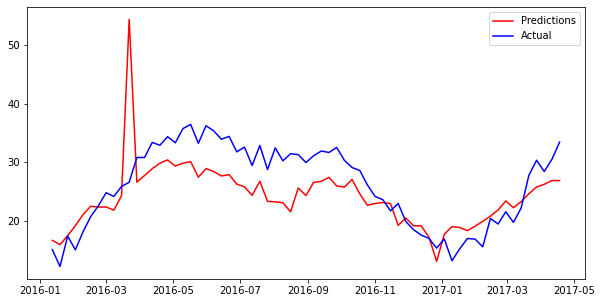

In [415]:
plt.figure(figsize=(10,5))
plt.plot(forecast, 'r', label = 'Predictions')
plt.plot(test_X, 'b', label='Actual')
plt.legend()